In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
x0 = 15.
mu = 6.3
sigma = np.sqrt(6.3)

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print("p-value: {} %".format(np.round(pvalue*100,2)))

Z = 3.4661629670697414
p-value: 0.05 %


The probability of observing 15 hurricanes in the same year is of 0.05 %,
which indicates a very significant difference and weird event.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
# Load the data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Study the students t-test
pre_mean = pre.mean()
post_mean = post.mean()

pre_dif = (pre - pre_mean)**2
sigma_pre = pre_dif.sum()/(len(pre)-1)
post_dif = (post - post_mean)**2
sigma_post = post_dif.sum()/(len(post)-1)

sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)
T = (pre_mean - post_mean)/(sigma*np.sqrt(2/len(pre)))
print("Student's t-test is", np.round(T,2))
pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))
print("p-value: {} %".format(np.round(pvalue*100,2)))

Student's t-test is -0.33
p-value: 74.89 %


Yes, the difference between both measurements is significant. It is of almost 75%.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

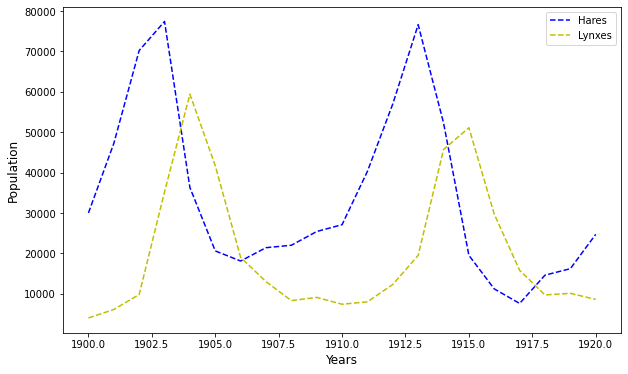

In [4]:
# Load the data into an array
animal_data = np.loadtxt('populations.txt')

#Create an array of each column
year = animal_data[:,0]
hares = animal_data[:,1]
lynxes = animal_data[:,2]

# Plot populations over the years
plt.figure(figsize=(10, 6))

plt.plot(year, hares, 'b--', label = 'Hares')
plt.plot(year, lynxes, 'y--', label = 'Lynxes')
plt.legend()
plt.xlabel( "Years", fontsize = 12, color="black")
plt.ylabel( "Population", fontsize = 12, color="black")

plt.show()

Hares period: 21.0 years
Lynxes period: 21.0 years


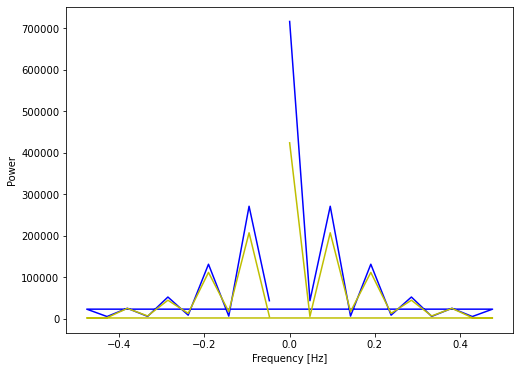

In [5]:
from scipy import fftpack

# The FFT of the signal
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)

# And the power (sig_fft is of complex dtype)
power_h = np.abs(hares_fft) # these are the "weights" of the Fourier components for each discrete frequency interval
power_l = np.abs(lynxes_fft)

# The return the corresponding frequencies
freq = fftpack.fftfreq(year.size, d = 1)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(freq, power_h, label = 'Hares', color = 'blue')
plt.plot(freq, power_l, label = 'Lynxes', color = 'y')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find out the period for each species
max_freq_h = freq[power_h[freq>0].argmax()]
max_freq_l = freq[power_l[freq>0].argmax()]
print('Hares period:', 1/max_freq_h, "years")
print('Lynxes period:', 1/max_freq_l, "years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

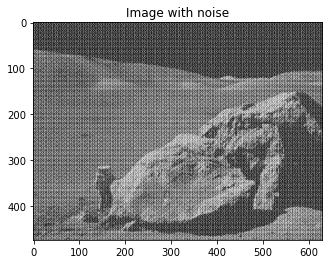

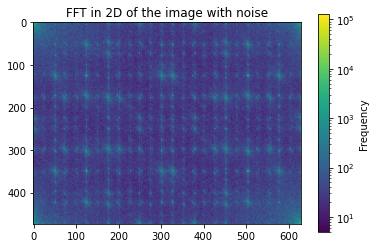

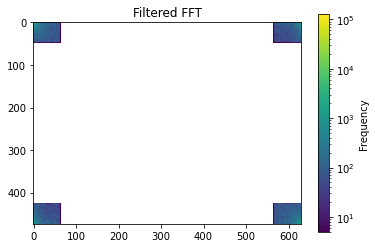

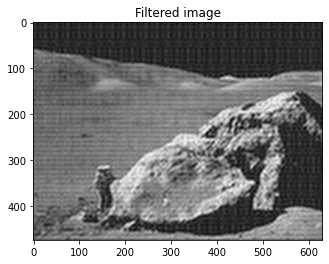

In [6]:
from matplotlib.colors import LogNorm

# Import the image as a numpy array
image = plt.imread("moonlanding.png")

# Plot the loaded image
plt.imshow(image, plt.cm.gray)
plt.title('Image with noise')
plt.show()

# Fourier transform
image_fft = fftpack.fft2(image)
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('FFT in 2D of the image with noise')
plt.colorbar(label = 'Frequency')
plt.show()

# Filter the noise
# Define the fraction of coefficients we want to keep
frac = 0.1
image_fftc = image_fft.copy()

# Compute number of columns and rows in the data
r, c = image_fftc.shape

# Set to zero all rows and columns with indices between r/c*frac and r/c*(1-frac)
image_fftc[int(r*frac):int(r*(1-frac))] = 0
image_fftc[:, int(c*frac):int(c*(1-frac))] = 0

# Plot filtered FFT
plt.imshow(np.abs(image_fftc), norm=LogNorm(vmin=5))
plt.title('Filtered FFT')
plt.colorbar(label = 'Frequency')
plt.show()

# Reconstruct the image
filtered_image = fftpack.ifft2(image_fftc)
plt.imshow(np.abs(filtered_image), plt.cm.gray)
plt.title('Filtered image')
plt.show()

